## Easy

Скачать данные отсюда (кнопка download all снизу):

[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df[df['Age'] < 18]['PassengerId'].count() * 100 / df['PassengerId'].count() 

12.682379349046016

In [46]:
male = df[df['Sex'] == 'male']['PassengerId'].count() 
female = df[df['Sex'] == 'female']['PassengerId'].count()
print(male, female, sep='/')
male/female

577/314


1.8375796178343948

## Normal

Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили. 

Посчитать [корреляцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) между возрастом и выживаемостью, полом и выживаемостью

In [37]:
df.dropna(axis=0, how='any', subset = ('Sex', 'Age'))['PassengerId'].count()

714

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

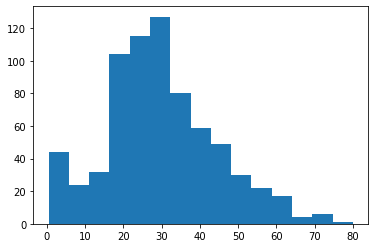

In [49]:
plt.hist(df['Age'], bins = 15)

In [55]:
wom_liv = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['PassengerId'].count() * 100 / df['PassengerId'].count() 
print (wom_liv)

12.2334455667789


In [56]:
man_liv = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['PassengerId'].count() * 100 / df['PassengerId'].count() 
print (man_liv)

26.150392817059483


In [58]:
kid_liv = df[(df['Survived'] == 1) & (df['Age'] < 18)]['PassengerId'].count() * 100 / df['PassengerId'].count() 
print (kid_liv)

6.846240179573513


In [59]:
df[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [60]:
df['wom_sex'] = df['Sex'] == 'female'
df[['wom_sex','Survived']].corr()

,wom_sex,Survived
wom_sex,1.000000,0.543351
Survived,0.543351,1.000000
